In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://github.com/ajtheb/Epidemic-forecasting-COVID-/raw/master/dataset/time_series_covid_india.csv')
df.head()

,Date,Cases
0,1/30/20,1
1,1/31/20,1
2,2/1/20,1
3,2/2/20,2
4,2/3/20,3


In [4]:
dt=pd.read_csv('https://github.com/ajtheb/Epidemic-forecasting-COVID-/raw/master/dataset/test_time_series_covid_india.csv')
dt.head()

,Date,Cases
0,5/11/20,70768
1,5/12/20,74292
2,5/13/20,78055
3,5/14/20,81997
4,5/15/20,85784


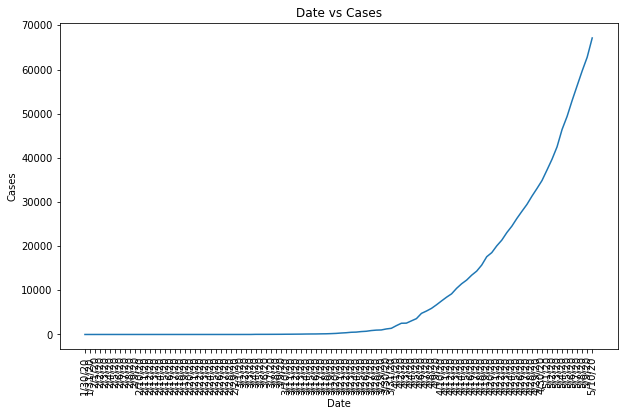

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title("Date vs Cases")
plt.xlabel('Date')
plt.ylabel('Cases')
plt.plot(df['Date'],df['Cases'])

# Data Preparation

In [5]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
  # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)
 
# define input sequence
raw_seq = df['Cases']
# choose a number of time steps
n_steps = 2
# split into samples
X, y = split_sequence(raw_seq, n_steps)
Xt,yt=split_sequence(raw_seq,n_steps)
# summarize the data
for i in range(len(X)):
 print(X[i], y[i])

[1 1] 1
[1 1] 2
[1 2] 3
[2 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 3
[3 3] 5
[3 5] 5
[5 5] 28
[ 5 28] 30
[28 30] 31
[30 31] 34
[31 34] 39
[34 39] 43
[39 43] 56
[43 56] 62
[56 62] 73
[62 73] 82
[73 82] 102
[ 82 102] 113
[102 113] 119
[113 119] 142
[119 142] 156
[142 156] 194
[156 194] 244
[194 244] 330
[244 330] 396
[330 396] 499
[396 499] 536
[499 536] 657
[536 657] 727
[657 727] 887
[727 887] 987
[887 987] 1024
[ 987 1024] 1251
[1024 1251] 1397
[1251 1397] 1998
[1397 1998] 2543
[1998 2543] 2567
[2543 2567] 3082
[2567 3082] 3588
[3082 3588] 4778
[3588 4778] 5311
[4778 5311] 5916
[5311 5916] 6725
[5916 6725] 7598
[6725 7598] 8446
[7598 8446] 9205
[8446 9205] 10453
[ 9205 10453] 11487
[10453 11487] 12322
[11487 12322] 13430
[12322 13430] 14352
[13430 14352] 15722
[14352 15722] 17615
[15722 17615] 18539
[17615 18539] 200

In [36]:
Xt

array([[    1,     1],
       [    1,     1],
       [    1,     2],
       [    2,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     3],
       [    3,     5],
       [    5,     5],
       [    5,    28],
       [   28,    30],
       [   30,    31],
       [   31,    34],
       [   34,    39],
       [   39,    43],
       [   43,    56],
       [   56,    62],
       [   62,    73],
       [   73,    82],
       [   

We used multi step univariate lstm model with step size as 2.

Epoch 1/400
4/4 [==============================] - 2s 182ms/step - loss: 280473232.0000 - val_loss: 285506240.0000
Epoch 2/400
4/4 [==============================] - 0s 20ms/step - loss: 280228064.0000 - val_loss: 277876448.0000
Epoch 3/400
4/4 [==============================] - 0s 20ms/step - loss: 274980512.0000 - val_loss: 249964848.0000
Epoch 4/400
4/4 [==============================] - 0s 20ms/step - loss: 256235808.0000 - val_loss: 239950544.0000
Epoch 5/400
4/4 [==============================] - 0s 20ms/step - loss: 222218659.2000 - val_loss: 229895104.0000
Epoch 6/400
4/4 [==============================] - 0s 20ms/step - loss: 199138182.4000 - val_loss: 212215392.0000
Epoch 7/400
4/4 [==============================] - 0s 27ms/step - loss: 232434537.6000 - val_loss: 196976128.0000
Epoch 8/400
4/4 [==============================] - 0s 30ms/step - loss: 189754604.8000 - val_loss: 148984080.0000
Epoch 9/400
4/4 [==============================] - 0s 22ms/step - loss: 131372196.8000 

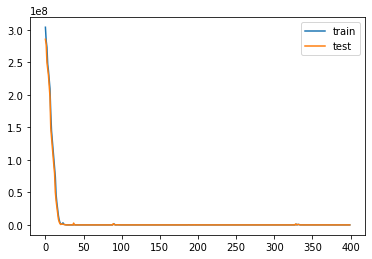

In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
X = X.reshape((X.shape[0], X.shape[1], 1))
Xt = Xt.reshape((Xt.shape[0], Xt.shape[1], 1))
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history=model.fit(X, y, epochs=400, validation_data=(Xt,yt))
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [29]:
pred=model.predict(Xt).reshape(1,-1)[0]
pred[pred<0]=0
pred=np.ceil(pred)
print(pred)
from sklearn.metrics import mean_squared_log_error
print("RMSLE",np.sqrt(mean_squared_log_error(yt,pred)))

[1.0000e+00 1.0000e+00 1.0000e+00 3.0000e+00 4.0000e+00 4.0000e+00
 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00
 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00
 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00
 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00
 4.0000e+00 6.0000e+00 1.1000e+01 3.1000e+01 3.6000e+01 3.8000e+01
 4.0000e+01 4.5000e+01 5.1000e+01 6.1000e+01 7.3000e+01 8.3000e+01
 9.5000e+01 1.1500e+02 1.3000e+02 1.3800e+02 1.6400e+02 1.8200e+02
 2.1600e+02 2.6100e+02 3.2900e+02 4.1000e+02 4.9700e+02 5.7800e+02
 6.5700e+02 7.6600e+02 8.8500e+02 1.0330e+03 1.1140e+03 1.2430e+03
 1.4570e+03 1.8310e+03 2.4700e+03 2.8300e+03 3.0860e+03 3.6520e+03
 4.5310e+03 5.5410e+03 6.1650e+03 6.9300e+03 7.8560e+03 8.8100e+03
 9.7070e+03 1.0776e+04 1.2057e+04 1.3109e+04 1.4161e+04 1.5300e+04
 1.6530e+04 1.8291e+04 1.9934e+04 2.1245e+04 2.2833e+04 2.4456e+04
 2.6227e+04 2.7976e+04 2.9848e+04 3.1605e+04 3.3479e+04 3.5489

 good, It is better than polynomial regression 1.75 rmsle and sier 1.5 rmsle given in the research paper.
 https://dl.acm.org/doi/10.1145/3411761

No handles with labels found to put in legend.


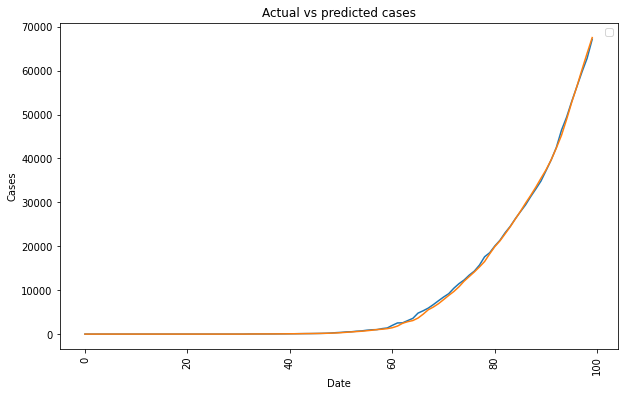

In [30]:
#Result
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title("Actual vs predicted cases")
plt.legend()
plt.plot(range(len(pred)),yt)
plt.plot(range(len(pred)),pred)

In [80]:
pd.DataFrame({"actual":yt,"prediction":pred})

,actual,prediction
0,1,0.0
1,2,0.0
2,3,0.0
3,3,2.0
4,3,4.0
...,...,...
95,52987,52775.0
96,56351,56383.0
97,59695,60209.0
98,62808,63901.0
